Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skew,kurtosis

Importing the dataset for 30 stocks dated from 08/01/2016 to 11/03/2022. The dataset also had end columns of market returns (NIFTY50) and Return Free Rates.
[Click Here For DataSet](https://docs.google.com/spreadsheets/d/1Df9zcDFRcF9uopvTnyo4CN_WSvMgW3faIRTqIR7YYHU/edit?usp=sharing)


In [ ]:
dataset = pd.read_csv('HS MIDSEM DATA.csv')
dataset.head() #printing the head of the dataset

,Unnamed: 0,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BRITANNIA,COALINDIA,GRASIM,HEROMOTOCO,HINDALCO,INDUSINDBK,...,NESTLEIND,NTPC,RELIANCE,TATACONSUM,TCS,TECHM,TITAN,WIPRO,NIFTY50,rff
0,2016-01-01,2052.233398,1921.477783,602.407593,1356.088379,187.170792,532.282837,2076.476318,74.016792,901.823120,...,5147.023,84.39459,483.9933,129.3622,1055.600,436.9839,332.2998,200.2421,7568.30,7.23
1,2016-01-08,2004.050171,1943.264648,599.408569,1333.560059,182.726639,523.603882,2008.458374,72.133774,893.540710,...,5126.213,87.66998,507.1123,123.8200,1014.445,439.7215,330.0301,198.5669,7536.80,7.23
2,2016-01-15,1928.128052,1841.410034,566.473083,1205.662354,165.265381,516.578491,2035.112915,65.953644,851.056091,...,4956.165,81.42533,470.1171,112.4587,1003.627,434.0325,331.6720,200.5881,7276.80,7.23
3,2016-01-22,1920.026733,1868.730713,569.827271,1228.926880,175.816711,500.552551,2010.147461,67.305550,883.942627,...,4991.854,88.31279,485.7368,113.7518,1040.281,427.7874,327.4224,199.2953,7424.65,7.31
4,2016-01-29,1960.108521,1875.361450,625.847595,1314.552368,184.934387,513.720459,2071.285400,66.339890,889.837830,...,5006.777,77.07855,464.7912,112.3201,1079.930,401.6094,349.6368,205.7908,7404.00,7.35


Separating the column data to different variables

In [ ]:
X = dataset.iloc[:, 1:-2].values #X is storing adj. closing prices of each stock columnwise
y = dataset.iloc[:, 0].values #y is storing the dates (time-series) in a weekly interval
index = dataset.iloc[:, -2].values #index is storing the market returns in a weekly interval
rft = dataset.iloc[:, -1].values #rft is storing risk free return values from the provided 00538375_20220308_192823.txt

Converting the values of every variable in above cell to their logarithmic values(base e) to accomodate the below 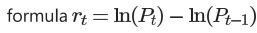

In [ ]:
X = np.log(X)
index = np.log(index)
rft = np.log(rft)

printing first elements of each array to get an idea

In [ ]:
print(X[0],index[0],rft[0])

[7.62668394 7.56084985 6.40093428 7.21235964 5.23202153 6.277175
 7.63842766 4.30429199 6.8044184  6.3396571  4.73226231 9.27649608
 5.34150789 7.87047783 6.61839309 5.65951323 6.43175064 5.36149215
 5.14750843 6.5362631  6.57482588 8.295184   8.54617377 4.4355033
 6.18207106 4.86261622 6.9618646  6.07989635 5.80603757 5.29952713] 8.931723750538012 1.9782390361706734


In [ ]:
print(len(X),len(index),len(rft)) #printing array size of each column array

324 324 324


Rit is the return series for all stocks and it is obtained by subtracting each row (log of closing prices of stock) from their previous week value. Here we have 30 stocks implying Q = 30. Here the length of the array becomes 1 less than as we are eliminating the first row.



In [ ]:
Rit = []
for i in range(len(X)-1):
  rit = []
  for j in range(30):
    rit.append(X[i+1][j] - X[i][j])
  Rit.append(rit)
print(Rit)

[[-0.023758444217444996, 0.011274798352527426, -0.004990830244914868, -0.016752261402115387, -0.024030266139666523, -0.016439548498100365, -0.033304929572656405, -0.025769619038026548, -0.009226507315383436, -0.007460211909746661, -0.014893843671591966, -0.07430316821801242, -0.0456437867236108, -0.01545014903723807, 0.010218273960940216, -0.04310619432927787, -0.03699250713978408, -0.0456035611795258, 0.024408628416468403, -0.010976143884501965, -0.06131643034839396, -0.004614655596064665, -0.004051309336816189, 0.03807623745087785, 0.04666141443209515, -0.043787323835872805, -0.03976766073139881, 0.006245219654916312, -0.00685371107241739, -0.00840106342965452], [-0.038620607343089475, -0.053837766015774946, -0.0565138859669041, -0.10082301494795409, -0.10043870853332226, -0.01350820396477026, 0.013183854158384634, -0.08957023572569156, -0.04871385768695102, -0.042846914184251794, -0.07412549347569897, -0.06772515813965896, -0.013281609557401097, 0.02565033649837556, -0.0238988531570

Rmt is the Market Return series and it is obtained by substracting each row from the previous week value.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Rmt = []
for m in range(len(index)-1):
  Rmt.append(index[m+1] - index[m])
print(Rmt)
print(len(Rmt))

[-0.004170782803553763, -0.03510648361829638, 0.020114340396567343, -0.0027851508193403873, -0.059494537344798815, 0.030408678353310847, -0.03123323143850598, 0.06994307933275223, 0.0014102630706336328, 0.003520308728576893, 0.02678593794552775, 0.002834054527451002, -0.025117693878824454, 0.03949360098470045, 0.007816058823028271, -0.008223761867974133, -0.014343028770143817, 0.021093267925579084, -0.014920130381957719, 0.036116850112668075, 0.018332352849441236, -0.001869381365276368, -0.007690768955260552, 0.015806607735983746, 0.002089599871354153, 0.006032865133406062, 0.02687274567315967, -0.006430438378524528, 0.01818824736850999, -0.013382011121979787, 0.004789066070587822, 0.0093945806615654, -0.009388761413237745, 0.021012067553570546, 0.020065940373875435, -0.02373091376353642, 0.014185359955025234, -0.03164302562826116, 0.013675881322907202, -0.015761570064723784, 0.01459550305320434, -0.009720169053579752, -0.015239882794572779, 0.004796989922548178, -0.053705311444415926,

Rft is the Risk Free Return series and it is obtained by substracting each row from the previous week value (previous row).

In [ ]:
Rft = []
for n in range(len(rft)-1):
  Rft.append(rft[n+1] - rft[n])
print(Rft)
print(len(Rft))

[0.0, 0.0, 0.011004237591013766, 0.005457039463057978, 0.0, 0.0, -0.010944021679317295, 0.0, 0.0, -0.005517255374754448, -0.05399038389653965, -0.0058565321127128644, 0.0, 0.0, 0.0058565321127128644, 0.0, 0.0, 0.0, 0.0, -0.0058565321127128644, -0.005891033237237275, 0.0, -0.00592594326754714, -0.01950549462425677, -0.006079046076382211, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.006116227017435971, 0.0, 0.0, -0.024845998586530804, 0.0, 0.006269613013595521, -0.006269613013595521, 0.006269613013595521, -0.014162313812504435, -0.060426543178568215, -0.013559529785632352, 0.013559529785632352, 0.0, 0.041225953321951225, 0.006441246102856901, 0.006400021845467618, -0.01284126794832452, 0.01284126794832452, 0.0, -0.006400021845467618, -0.006441246102856901, -0.013008313513000802, 0.013008313513000802, -0.00648300487807818, -0.013093476747019661, -0.021649471696853384, 0.0, -0.013559529785632352, -0.006849341845574841, 0.006849341845574841, 0.020270964373619194, 0.02150620522096358, 0.013008

taking an example stock (TATASTEEL) and plotting example excess stock returns vs excess market returns.

-6.315974616820697
79.56049719441008


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


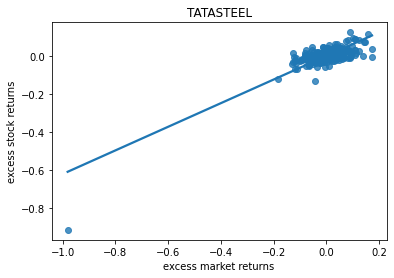

In [ ]:
stocknumber = 12 # column 12 of data (TATASTEEL COLUMN)
excess_stock_returns = [] #creating array for excess stock returns
excess_market_returns = [] #creating array for excess market returns
for i in range(323): #323 as we have 323 datapoints(weeks) for each stock
  excess_stock_returns.append(Rit[i][stocknumber] - Rft[i]) #subracting the corresponding RFT of the week
  excess_market_returns.append(Rmt[i] - Rft[i]) #subracting the corresponding RFT of the week
ax = sns.regplot(excess_stock_returns, excess_market_returns, ci=None) #plotting a scatter plot and trendline for the given stock
ax.set(xlabel='excess market returns ',ylabel='excess stock returns',title='TATASTEEL')
print(skew(excess_stock_returns, bias=False)) #skew
print(kurtosis(excess_stock_returns, bias=False)) #kurtosis

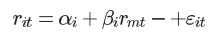


To fit the above equation we used OLS module from statmodels.api to create simple linear regression model.





In [ ]:
alphas = [] #values of alpha for stock i
betas = [] #values of alpha for stock i
residuals = [] #values of residuals for each week corresponding to each stock (323 for each i)
sigma_squared_residuals = [] #estimated standard deviation of non-systematic part of stock i
betas_squared = [] #squared values from beta array
R_squared = [] #R^2 values
stno = 0 #iniating from first stock column viz. BAJAJ-AUTO
for k in range(30): #30 for each stock
  yy = [] #dependent variable viz . Rit
  xx = [] #independent variable viz. Rmt
  for i in range(323):
    yy.append(Rit[i][stno]) #for each stock
    xx.append(Rmt[i])
  xx = np.array(xx).reshape((-1, 1))
  yy = np.array(yy)
  X_sm = sm.add_constant(xx) #intecept
  model = sm.OLS(yy,X_sm) #fitting linear regression model to xx,yy
  results = model.fit()
  betas.append(results.params[1]) #extracting value of beta from model for stock i
  alphas.append(results.params[0]) #extracting intercept viz. alpha
  residuals.append(results.resid) #appending residuals for each week per stock
  R_squared.append(results.rsquared) #appending R^2 values
  stno += 1 #increment for next stock (BAJAJ-AUTO to BAJAJFINSV ... and so on)
for o in range(30):
  sigma_squared_residuals.append(np.std(residuals[o])) #appending standard deviation of residuals (323 values) for each stock i
  betas_squared.append((betas[o])**2) #storing beta squared values from 'betas' array
print(alphas)
print(betas)
print(sigma_squared_residuals)
print(betas_squared)
print(R_squared)


[-0.0002193848911918764, 0.0033921844815240926, 0.0037583718661097143, 0.0007472676447062882, -0.002547192221094028, 0.0007368667045027396, -0.0018815617843306752, 0.0028826738844915318, -0.0047808519772686905, -0.002077606092085716, -0.0015181493431728188, -0.0001770114073712764, 0.002315352828399818, 7.466674978543771e-05, -0.0011075600811648945, 0.0010157964702367252, 0.00044808186578556793, 0.00022520707294718803, -0.0009968815316752954, 0.00036974386984096354, 2.9213980711998152e-05, -0.0007297183467157944, 0.002291678009272123, -0.00045608441390401354, 0.0021476645016036402, 0.0030919570782017127, 0.0020486626586942998, 0.0017897805340169523, 0.003898421282396152, 0.0016294112665652552]
[0.7378325462162818, 1.2542418339253811, 1.4844084668184452, 0.7787660416897161, 0.9273861525506251, 1.0478183083719002, 0.8955945534584316, 1.3623161722501402, 1.919130642257357, 1.2054029383021916, 1.06835355933989, 1.0169287588854712, 1.282919643293394, 1.0084943801147335, 0.6641620751326057, 0

Forming the average returns of stock array by taking average of each stock closing prices over the 323 weeks.

In [ ]:
average_Rit = []
for x in range(30):
  sum = 0
  for y in range(323):
    sum += Rit[y][x] #increasing sum for each row and adding all return series values
  average_Rit.append(sum/323) #appending the average of 323 elements
print(average_Rit)


[0.0016118229325697282, 0.006505055377436028, 0.00744248747206334, 0.002680067269411424, -0.0002455361245885297, 0.0033374203043825983, 0.00034119155126238635, 0.006263771730953496, -1.781046474079601e-05, 0.0009140527913883117, 0.0011333701736055714, 0.002346878205561822, 0.0054993984497319764, 0.00257762329264356, 0.0005408068748138393, 0.002773950165552156, 0.001677520728372012, 0.003671192851679913, 0.0010035040020861144, 0.0028538045561201783, 0.0027516882621082765, 0.0019094855005667754, 0.003781999055602472, 0.001362463249993909, 0.00490961805355192, 0.005435258741620339, 0.0037929679200491445, 0.003731690397023197, 0.006317439156162169, 0.0033334039601702076]


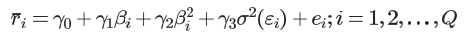
Considering this to be a multivariable linear regression

Here , Beta i, Beta squared i and sigma squared of residual will be the three independent variable.

In [ ]:
XX = [] #array for independent variables
for p in range(30):
  trash = [] #trash variable to accomodate all independent variables in XX
  trash.append(betas[p])
  trash.append(betas_squared[p])
  trash.append(sigma_squared_residuals[p])
  XX.append(trash)
YY = average_Rit #dependent variable average returns
X_SM = sm.add_constant(XX) #intercept
regr = sm.OLS(YY,X_SM) #fitting model
res = regr.fit()
res.summary() #extracting values from the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.585
Date:                Thu, 17 Mar 2022   Prob (F-statistic):              0.217
Time:                        10:19:16   Log-Likelihood:                 145.79
No. Observations:                  30   AIC:                            -283.6
Df Residuals:                      26   BIC:                            -278.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.005     -1.215      0.235      -0.015       0.004
x1             0.0123      0.006      1.943      0.063      -0.001       0.025
x2            -0.0049      0.003     -1.747      0.092      -0.011       0.001
x3             0.0477      0.084      0.570      0.574      -0.124       0.220
==============================================================================
Omnibus:                        1.047   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.839
Skew:                          -0.056   Prob(JB):                        0.657
Kurtosis:                       2.188   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(res.params) #printing coeffcients
print(res.resid) #printing residuals viz ei

[-0.00559068  0.01232926 -0.00494596  0.04770846]
[-6.53882736e-04  2.53246761e-03  3.69110713e-03  2.72046785e-04
 -3.81489150e-03 -2.10008416e-04 -2.70598616e-03  2.08912893e-03
 -2.12457676e-03 -2.80842879e-03 -2.78465751e-03 -1.11213873e-03
  1.30965256e-03 -6.01033693e-04 -1.74850754e-03  2.07732363e-04
  6.97077256e-04  8.03397431e-05 -1.60954291e-03 -2.41422796e-04
 -5.43474333e-04 -1.57815169e-03  2.41354988e-03 -9.68495479e-04
  1.42672138e-03  1.95796559e-03  1.71068867e-03  1.05765644e-03
  2.85626005e-03  1.20280465e-03]


In [ ]:
print("gamma 0 = ", res.params[0])
print("gamma 1 = ", res.params[1])
print("gamma 2 = ", res.params[2])
print("gamma 3 = ", res.params[3])

gamma 0 =  -0.005590680174750133
gamma 1 =  0.012329257338266479
gamma 2 =  -0.0049459609230523395
gamma 3 =  0.047708464933414206


printing average returns vs estimated betas to make security market line

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'average returns'),
 Text(0.5, 0, 'estimated betas'),
 Text(0.5, 1.0, 'Security Market Line')]

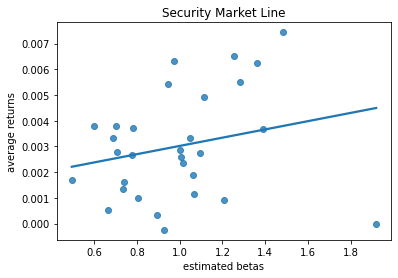

In [ ]:
sx = sns.regplot(betas, average_Rit, ci=None)
sx.set(xlabel='estimated betas',ylabel='average returns',title='Security Market Line')